In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [3]:
train.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [4]:
train.describe()

,id,num_sold
count,230130.000000,221259.000000
mean,115064.500000,752.527382
std,66432.953062,690.165445
min,0.000000,5.000000
25%,57532.250000,219.000000
50%,115064.500000,605.000000
75%,172596.750000,1114.000000
max,230129.000000,5939.000000


In [5]:
train.isna().sum()

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

In [6]:
train['store'].groupby(train['product']).value_counts()

product             store               
Holographic Goose   Discount Stickers       15342
                    Premium Sticker Mart    15342
                    Stickers for Less       15342
Kaggle              Discount Stickers       15342
                    Premium Sticker Mart    15342
                    Stickers for Less       15342
Kaggle Tiers        Discount Stickers       15342
                    Premium Sticker Mart    15342
                    Stickers for Less       15342
Kerneler            Discount Stickers       15342
                    Premium Sticker Mart    15342
                    Stickers for Less       15342
Kerneler Dark Mode  Discount Stickers       15342
                    Premium Sticker Mart    15342
                    Stickers for Less       15342
Name: count, dtype: int64

In [7]:
test['store'].groupby(test['product']).value_counts()

product             store               
Holographic Goose   Discount Stickers       6570
                    Premium Sticker Mart    6570
                    Stickers for Less       6570
Kaggle              Discount Stickers       6570
                    Premium Sticker Mart    6570
                    Stickers for Less       6570
Kaggle Tiers        Discount Stickers       6570
                    Premium Sticker Mart    6570
                    Stickers for Less       6570
Kerneler            Discount Stickers       6570
                    Premium Sticker Mart    6570
                    Stickers for Less       6570
Kerneler Dark Mode  Discount Stickers       6570
                    Premium Sticker Mart    6570
                    Stickers for Less       6570
Name: count, dtype: int64

<Axes: xlabel='num_sold', ylabel='Count'>

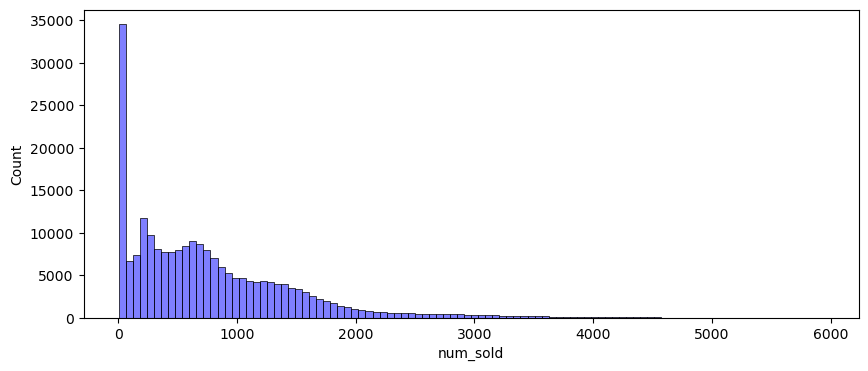

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 4))

sns.histplot(train['num_sold'], bins=100, color='blue', alpha=0.5, label='train')
# train['num_sold'].plot(kind='hist', bins=100)

<Axes: xlabel='store'>

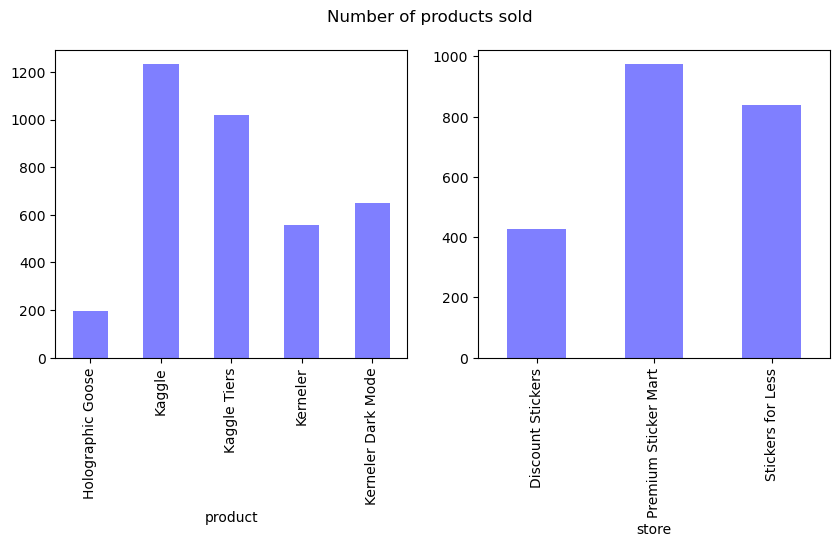

In [9]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.suptitle('Number of products sold')
train['num_sold'].groupby(train['product']).mean().plot(kind='bar', color='blue', alpha=0.5, label='train')

plt.subplot(1, 2, 2)
plt.suptitle('Number of products sold')
train['num_sold'].groupby(train['store']).mean().plot(kind='bar', color='blue', alpha=0.5, label='train')
 

In [10]:
catcols = [col for col in train.columns if train[col].dtype == 'O']
catcols

['date', 'country', 'store', 'product']

In [46]:
train['date'].head(200) # yyyy-mm-dd

def format_date(train):
    train['year'] = train['date'].apply(lambda x: x.split('-')[0]).astype(int)
    train['month'] = train['date'].apply(lambda x: x.split('-')[1]).astype(int)
    train['day'] = train['date'].apply(lambda x: x.split('-')[2]).astype(int)
    
    return train
train = format_date(train)
train.head()

,id,date,country,store,product,num_sold,year,month,day
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN,2010,1,1
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,2010,1,1
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,1,1
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,2010,1,1
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,1,1


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
 6   year      230130 non-null  int64  
 7   month     230130 non-null  int64  
 8   day       230130 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 15.8+ MB


In [22]:
train_x = pd.get_dummies(train.drop(['date'], axis=1))
train_x.head()

,id,num_sold,year,month,day,country_Canada,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore,store_Discount Stickers,store_Premium Sticker Mart,store_Stickers for Less,product_Holographic Goose,product_Kaggle,product_Kaggle Tiers,product_Kerneler,product_Kerneler Dark Mode
0,0,NaN,2010,1,1,True,False,False,False,False,False,True,False,False,True,False,False,False,False
1,1,973.0,2010,1,1,True,False,False,False,False,False,True,False,False,False,True,False,False,False
2,2,906.0,2010,1,1,True,False,False,False,False,False,True,False,False,False,False,True,False,False
3,3,423.0,2010,1,1,True,False,False,False,False,False,True,False,False,False,False,False,True,False
4,4,491.0,2010,1,1,True,False,False,False,False,False,True,False,False,False,False,False,False,True


Text(0.5, 1.0, 'Correlations with |r| > 0.1')

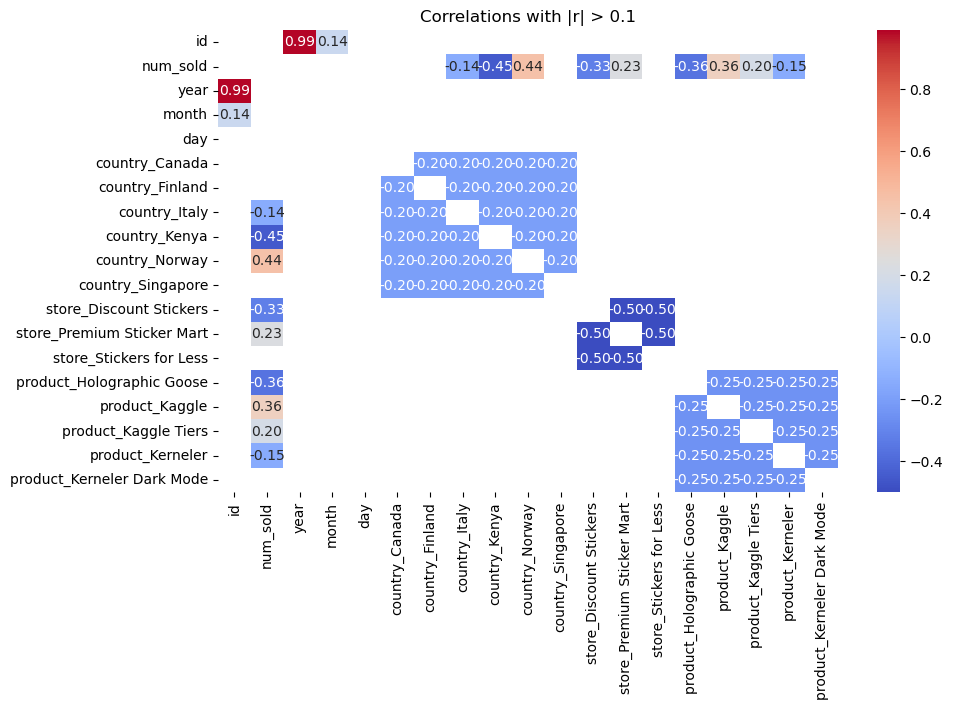

In [27]:
# Get correlation matrix
corr_mat = train_x.corr()

# Filter correlations outside [-0.1, 0.1] range
mask = ((corr_mat > 0.1) | (corr_mat < -0.1)) & (corr_mat != 1.0)
filtered_corr = corr_mat.mask(~mask, 0)

# Plot heatmap with filtered correlations
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_corr, 
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            mask=(filtered_corr == 0))
plt.title('Correlations with |r| > 0.1')

In [30]:
imp_cols = ['country_Italy', 'country_Kenya', 'country_Norway', 'store_Discount Stickers', 'store_Premium Sticker Mart', 'product_Holographic Goose', 'product_Kaggle', 'product_Kaggle Tiers', 'product_Kerneler']

train_x = train_x[imp_cols]
train_x.head()

,country_Italy,country_Kenya,country_Norway,store_Discount Stickers,store_Premium Sticker Mart,product_Holographic Goose,product_Kaggle,product_Kaggle Tiers,product_Kerneler
0,False,False,False,True,False,True,False,False,False
1,False,False,False,True,False,False,True,False,False
2,False,False,False,True,False,False,False,True,False
3,False,False,False,True,False,False,False,False,True
4,False,False,False,True,False,False,False,False,False


In [39]:
from sklearn.impute import SimpleImputer

sm = SimpleImputer(strategy='mean')
y = train['num_sold']
y = sm.fit_transform(y.values.reshape(-1, 1)).flatten()
y

array([ 752.52738194,  973.        ,  906.        , ..., 2299.        ,
       1242.        , 1622.        ])

In [40]:
train_x.shape, y.shape

((230130, 9), (230130,))

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

In [42]:
x_train, x_val, y_train, y_val = train_test_split(train_x, y, test_size=0.2, random_state=42)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((184104, 9), (46026, 9), (184104,), (46026,))

In [43]:
clf = RandomForestRegressor(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [44]:
y_preds = clf.predict(x_val)
mean_absolute_percentage_error(y_val, y_preds)

0.8447665042219492

In [50]:
test = format_date(test)
ids = test['id']
test_x = pd.get_dummies(test.drop(['date'], axis=1))

In [51]:
test_x = test_x[imp_cols]
test_x.shape

(98550, 9)

In [52]:
y_preds = clf.predict(test_x)

In [53]:
submission = pd.DataFrame({'id': ids, 'num_sold': y_preds})
submission.to_csv('submission.csv', index=False)